In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score
df = pd.read_csv("CaliforniaHousing.csv")
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [2]:
def fit(df):
    X=df[df.columns[:-1]]
    y=df[df.columns[-1]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    coef = pd.Series(model.coef_, index=X.columns)
    print(f"MAPE: {mape:.4f}")
    print(f"R2: {r2:.4f}")
    print(coef)
    return coef
coef=fit(df)

MAPE: 0.3233
R2: 0.5943
MedInc        0.433333
HouseAge      0.009293
AveRooms     -0.098643
AveBedrms     0.593215
Population   -0.000008
AveOccup     -0.004745
Latitude     -0.421449
Longitude    -0.434166
dtype: float64


In [3]:
cond1 = (df["MedHouseVal"] <= 5)
cond2 = (df["AveRooms"] <= df["AveRooms"].quantile(0.99))
cond3 = (df["AveBedrms"] <= df["AveBedrms"].quantile(0.99))
cond4 = (df["Population"] <= df["Population"].quantile(0.99))
cond5 = (df["AveOccup"] <= df["AveOccup"].quantile(0.99))
df_prep = df.loc[cond1 & cond2 & cond3 & cond4 & cond5]
df_prep.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,19055.000000,19055.000000,19055.000000,19055.000000,19055.000000,19055.000000,19055.000000,19055.000000,19055.000000
mean,3.675348,28.662136,5.210592,1.064349,1377.220310,2.912624,35.648000,-119.579213,1.931627
std,1.563962,12.421668,1.165471,0.116880,866.285478,0.695460,2.144714,2.005519,0.980969
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.525450,18.000000,4.410857,1.004938,802.000000,2.443988,33.930000,-121.790000,1.163000
50%,3.449000,29.000000,5.169444,1.047521,1175.000000,2.832461,34.270000,-118.510000,1.746000
75%,4.583300,37.000000,5.940678,1.096614,1720.000000,3.289391,37.730000,-118.010000,2.500000
max,15.000100,52.000000,10.352941,2.127208,5804.000000,5.392954,41.950000,-114.550000,5.000000


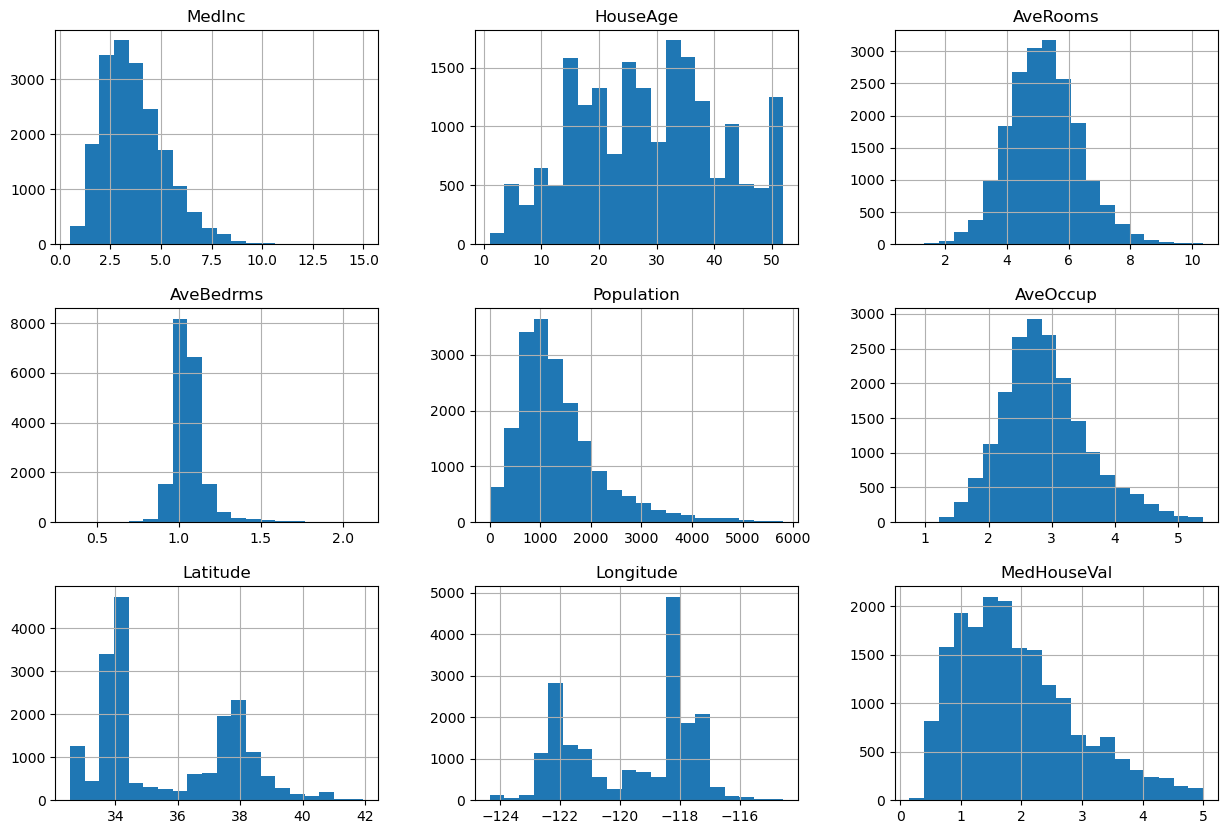

In [5]:
df_prep.hist(bins=20, figsize=(15, 10))
plt.savefig("PDA_230868_8_1.png")